# Estudo

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:0

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import TCNModel

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Your Alpha Vantage API key
api_key = 'your_api_key'

# The symbol for the equity we want to get data for
symbol = 'TSLA'

# Alpha Vantage API endpoint
url = 'https://www.alphavantage.co/query'

# Define the parameters for the API request
# See the Alpha Vantage API documentation for the meaning of the parameters below
params = {
    'function': 'TIME_SERIES_INTRADAY',
    'symbol': symbol,
    'adjusted': 'true',
    'extended_hours': 'true',
    'interval': '1min',  # or 1min, 15min, 30min, 60min
    'apikey': api_key,
    'datatype': 'json',  # fetch data in JSON format
    'month': '2023-09',
    'outputsize': 'full'
}

# This function gets Open High Low Close Volume (OHLCV) data, given the parameters defined above
def get_stock_data(params):

    # Make the HTTP request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Convert the response to JSON format
        data = response.json()

        # The data keys depend on the type of data requested
        # For TIME_SERIES_INTRADAY, it usually looks like 'Time Series (5min)'
        time_series_key = list(data.keys())[1]  # This gets the second key in the JSON response

        # Convert the JSON object to a Pandas DataFrame
        df = pd.DataFrame.from_dict(data[time_series_key], orient='index')

        # Convert the index to datetime and the columns to numeric values
        df.index = pd.to_datetime(df.index)
        df = df.apply(pd.to_numeric)

        # Show the DataFrame
        # print(df)

        return df, data
    else:
        print("Error fetching data:", response.status_code)

In [ ]:
tsla_data_list = []

# 2022
for month in range(1, 12+1):

    if month < 10:
        month = '0'+str(month)
    else:
        month = str(month)

    params = {
        'function': 'TIME_SERIES_INTRADAY',
        'symbol': symbol,
        'adjusted': 'true',
        'extended_hours': 'true',
        'interval': '1min',  # or 1min, 15min, 30min, 60min
        'apikey': api_key,
        'datatype': 'json',  # fetch data in JSON format
        'month': '2022-'+month,
        'outputsize': 'full'  # use 'compact' for last 100 data points
    }

    tsla_df_current_month, _ = get_stock_data(params)
    tsla_data_list.append(tsla_df_current_month)

# 2023
for month in range(1, 9+1):
    params = {
        'function': 'TIME_SERIES_INTRADAY',
        'symbol': symbol,
        'adjusted': 'true',
        'extended_hours': 'true',
        'interval': '1min',  # or 1min, 15min, 30min, 60min
        'apikey': api_key,
        'datatype': 'json',  # fetch data in JSON format
        'month': '2023-0'+str(month),
        'outputsize': 'full'  # use 'compact' for last 100 data points
    }

    tsla_df_current_month, _ = get_stock_data(params)
    tsla_data_list.append(tsla_df_current_month)

# I won't need this variable anymore so I will delete it
del tsla_df_current_month

In [ ]:
tsla_df = pd.concat(tsla_data_list)
tsla_df = tsla_df.sort_index(ascending=True)
tsla_df

,1. open,2. high,3. low,4. close,5. volume
2022-01-03 04:00:00,369.9133,373.8300,368.6667,373.8300,15174
2022-01-03 04:01:00,373.3333,373.3333,371.7367,372.0000,6822
2022-01-03 04:02:00,372.0000,375.2367,372.0000,374.8867,13497
2022-01-03 04:03:00,374.5200,374.8867,373.2967,373.6667,10299
2022-01-03 04:04:00,374.0000,375.1000,374.0000,375.1000,9588
...,...,...,...,...,...
2023-09-29 19:55:00,249.7300,249.7500,249.7100,249.7500,4200
2023-09-29 19:56:00,249.7200,249.8000,249.7100,249.7800,2751
2023-09-29 19:57:00,249.8000,249.9000,249.7000,249.9000,7615
2023-09-29 19:58:00,249.9007,249.9800,249.8000,249.8300,2770


In [ ]:
# Forward fill missing timestamp rows
train_date_range = pd.date_range(start=tsla_df.index.min(), end=tsla_df.index.max(), freq='T')
tsla_df = tsla_df.reindex(train_date_range)
tsla_df = tsla_df.ffill()

tsla_df

<ipython-input-8-7d99fefe7e2a>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  train_date_range = pd.date_range(start=tsla_df.index.min(), end=tsla_df.index.max(), freq='T')


,1. open,2. high,3. low,4. close,5. volume
2022-01-03 04:00:00,369.9133,373.8300,368.6667,373.8300,15174.0
2022-01-03 04:01:00,373.3333,373.3333,371.7367,372.0000,6822.0
2022-01-03 04:02:00,372.0000,375.2367,372.0000,374.8867,13497.0
2022-01-03 04:03:00,374.5200,374.8867,373.2967,373.6667,10299.0
2022-01-03 04:04:00,374.0000,375.1000,374.0000,375.1000,9588.0
...,...,...,...,...,...
2023-09-29 19:55:00,249.7300,249.7500,249.7100,249.7500,4200.0
2023-09-29 19:56:00,249.7200,249.8000,249.7100,249.7800,2751.0
2023-09-29 19:57:00,249.8000,249.9000,249.7000,249.9000,7615.0
2023-09-29 19:58:00,249.9007,249.9800,249.8000,249.8300,2770.0


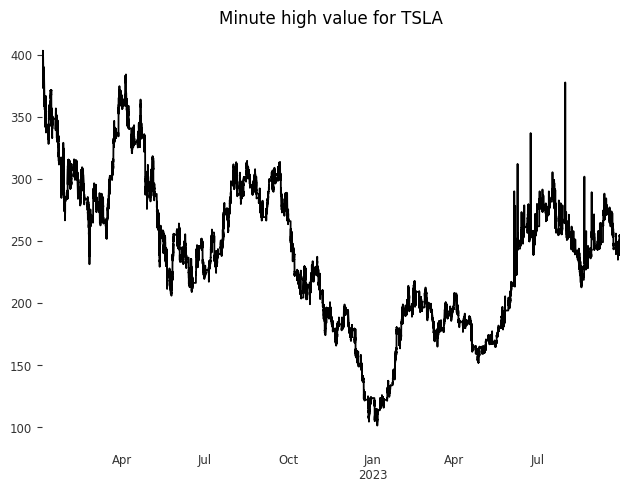

In [ ]:
tsla_df['2. high'].plot()
plt.tight_layout()
plt.title('Minute high value for TSLA')
plt.grid()
plt.show()

In [ ]:
# Convert full data frame into a darts TimeSeries
tsla_darts_ts = TimeSeries.from_dataframe(tsla_df)

# Split up tsla_darts_ts into target and past covariates TimeSeries
past_covariates = tsla_darts_ts.drop_columns(['2. high'])
target = tsla_darts_ts.drop_columns(['1. open',	'3. low', '4. close', '5. volume'])

# scale the past_covariates
scaler = Scaler()
past_covariates = scaler.fit_transform(past_covariates)

# scale the target
scaler = Scaler()
target = scaler.fit_transform(target)

# split target
train_target, val_target = target.split_after(
    pd.Timestamp("2023-05-31 00:00:00")
)

# split past_covariates
train_past_covariates, val_past_covariates = past_covariates.split_after(
    pd.Timestamp("2023-05-31 00:00:00")
)

# instantiate the TCN model (using the default architecture from darts)
deeptcn = TCNModel(
    dropout=0.2,
    batch_size=32,
    n_epochs=2,
    optimizer_kwargs={"lr": 1e-3},
    random_state=0,
    input_chunk_length=60*6, # past 6 hours
    output_chunk_length=60, # Forecast an hour ahead
)

# train
deeptcn.fit(series=train_target, past_covariates=train_past_covariates, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 440    | train
-------------------------------------------------------------
440       Trainable params
0         Non-trainable params
440       Total params
0.002     Total estimated model params size (MB)
43        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


TCNModel(output_chunk_shift=0, kernel_size=3, num_filters=3, num_layers=None, dilation_base=2, weight_norm=False, dropout=0.2, batch_size=32, n_epochs=2, optimizer_kwargs={'lr': 0.001}, random_state=0, input_chunk_length=360, output_chunk_length=60)

In [ ]:
backtest_en = deeptcn.historical_forecasts(
    series=target,
    past_covariates=past_covariates,
    start=pd.Timestamp("2023-05-31 00:01:00"),
    forecast_horizon=60,
    stride=119,
    retrain=False,
    verbose=False,
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


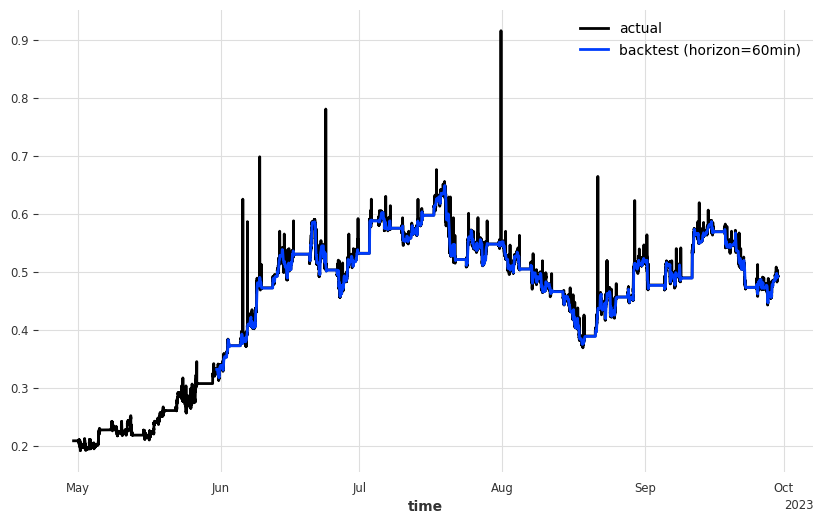

In [ ]:
plt.figure(figsize=(10, 6))
target.drop_before(pd.Timestamp("2023-04-30 00:01:00")).plot(label="actual")
backtest_en.plot(label="backtest (horizon=60min)")
plt.legend()

In [ ]:
from darts.models import LinearRegressionModel

<Axes: xlabel='time'>

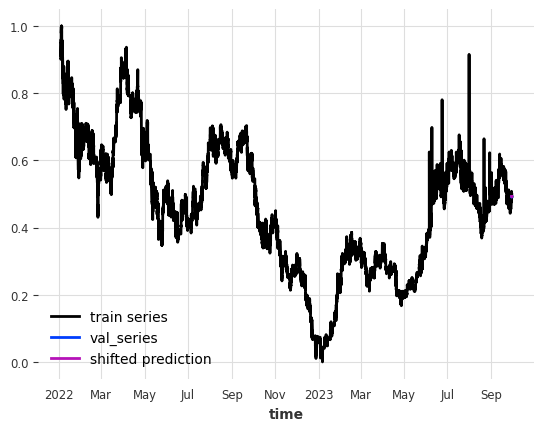

In [ ]:
model_shifted = LinearRegressionModel(
    lags=12,
    lags_future_covariates=(0, 12),
    output_chunk_length=12,
    output_chunk_shift=12,
)

model_shifted.fit(target[:-24], future_covariates=val_target)
preds = model_shifted.predict(n=12)

target[:-24].plot(label="train series")
target[-24:].plot(label="val_series")
preds.plot(label="shifted prediction")



In [ ]:
# prompt: o gráfico está plotando de mar 2022 a sep de 2023 eu quero apenas de jul de 2023 à sep 2023

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Filter the DataFrame to include data from July 2023 to September 2023
tsla_df_filtered = tsla_df['2023-07-01':'2023-09-30']

# Plot the filtered data
tsla_df_filtered['2. high'].plot()
plt.tight_layout()
plt.title('Minute high value for TSLA (Jul 2023 - Sep 2023)')
plt.grid()
plt.show()

# ... (Rest of your code) ...

In [ ]:
tsla_df

,1. open,2. high,3. low,4. close,5. volume
time,,,,,
2022-01-03 04:00:00,369.9133,373.8300,368.6667,373.8300,15174.0
2022-01-03 04:01:00,373.3333,373.3333,371.7367,372.0000,6822.0
2022-01-03 04:02:00,372.0000,375.2367,372.0000,374.8867,13497.0
2022-01-03 04:03:00,374.5200,374.8867,373.2967,373.6667,10299.0
2022-01-03 04:04:00,374.0000,375.1000,374.0000,375.1000,9588.0
...,...,...,...,...,...
2023-09-29 19:55:00,249.7300,249.7500,249.7100,249.7500,4200.0
2023-09-29 19:56:00,249.7200,249.8000,249.7100,249.7800,2751.0
2023-09-29 19:57:00,249.8000,249.9000,249.7000,249.9000,7615.0


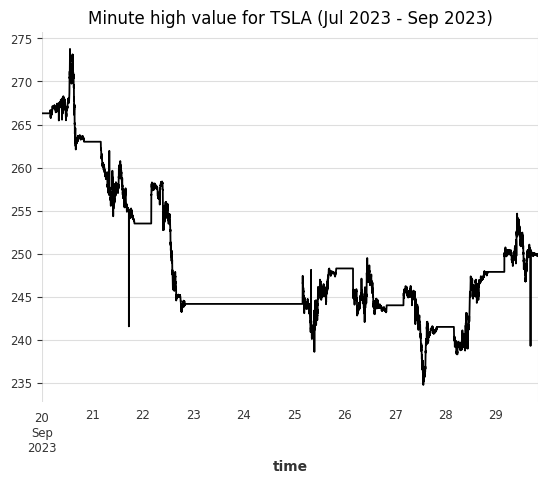

In [ ]:
tsla_df_filtered = tsla_df['2023-09-20':'2023-09-30']

tsla_df_filtered['4. close'].plot()
#plt.tight_layout()
plt.title('Minute high value for TSLA (Jul 2023 - Sep 2023)')
#plt.grid()
plt.show()

In [ ]:
#target[0:5]
targer_f = target[912915:913920]
targer_f

<TimeSeries (DataArray) (time: 1005, component: 1, sample: 1)> Size: 8kB
array([[[0.48504486]],

       [[0.48504486]],

       [[0.48504486]],

       ...,

       [[0.49173331]],

       [[0.4919982 ]],

       [[0.49203131]]])
Coordinates:
  * time       (time) datetime64[ns] 8kB 2023-09-29T03:15:00 ... 2023-09-29T1...
  * component  (component) object 8B '2. high'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
val_target_f = val_target[174434:175439]
val_target_f

<TimeSeries (DataArray) (time: 1005, component: 1, sample: 1)> Size: 8kB
array([[[0.48504486]],

       [[0.48504486]],

       [[0.48504486]],

       ...,

       [[0.49173331]],

       [[0.4919982 ]],

       [[0.49203131]]])
Coordinates:
  * time       (time) datetime64[ns] 8kB 2023-09-29T03:15:00 ... 2023-09-29T1...
  * component  (component) object 8B '2. high'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
model_shifted = LinearRegressionModel(
    lags=12,
    lags_future_covariates=(0, 12),
    output_chunk_length=12,
    output_chunk_shift=12,
)

model_shifted.fit(targer_f['4. close'][:-24], future_covariates=val_target_f)
preds = model_shifted.predict(n=12)

targer_f['4. close'][:-24].plot(label="train series")
targer_f['4. close'][-24:].plot(label="val_series")
preds.plot(label="shifted prediction")

KeyError: "not all values found in index 'component'"

---

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset



<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)> Size: 1kB
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1kB 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='Month'>

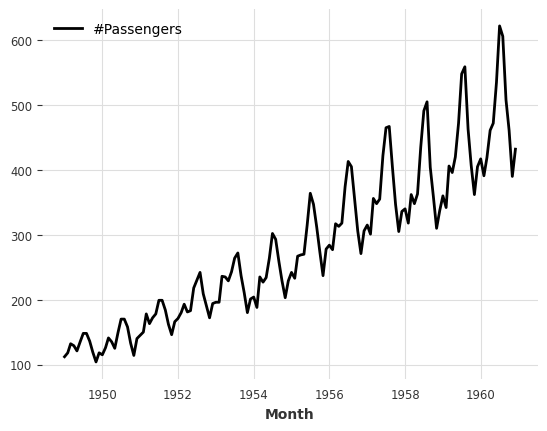

In [ ]:
series = AirPassengersDataset().load()
series.plot()

<Axes: xlabel='Month'>

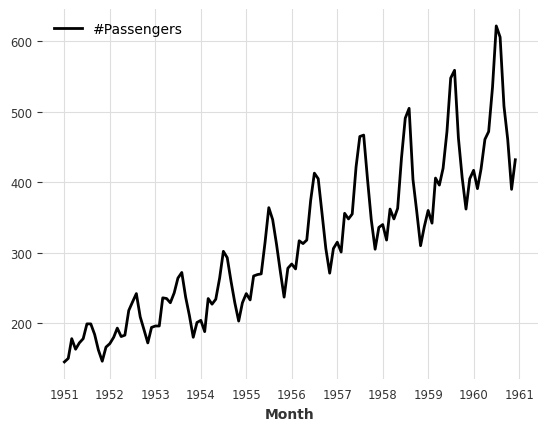

In [ ]:
series = AirPassengersDataset().load()
series[24:].plot()

<Axes: xlabel='Month'>

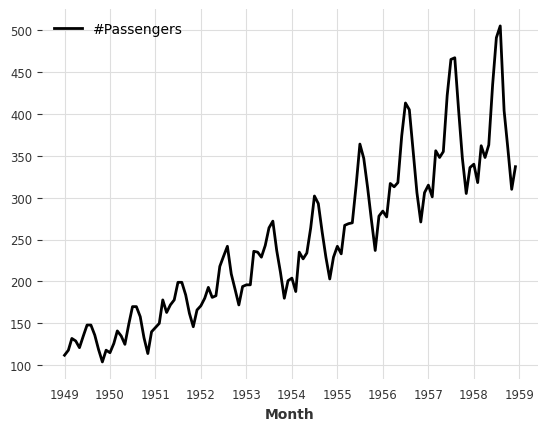

In [ ]:
series = AirPassengersDataset().load()
series[:-24].plot()

<Axes: xlabel='Month'>

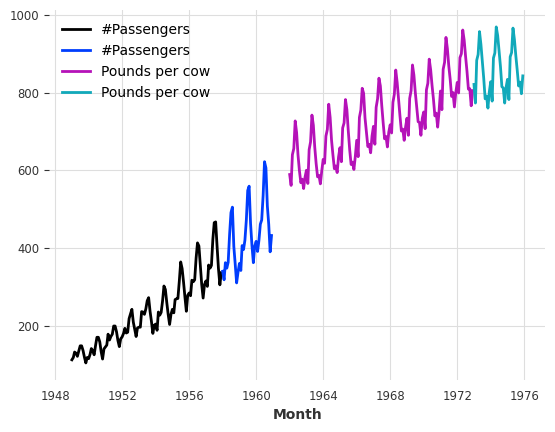

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

series_air = AirPassengersDataset().load().astype(np.float32)
series_milk = MonthlyMilkDataset().load().astype(np.float32)

# set aside last 36 months of each series as validation set:
train_air, val_air = series_air[:-36], series_air[-36:]
train_milk, val_milk = series_milk[:-36], series_milk[-36:]

train_air.plot()
val_air.plot()
train_milk.plot()
val_milk.plot()

Text(0.5, 1.0, 'one multivariate time series of 2 dimensions, containing covariates for the air series:')

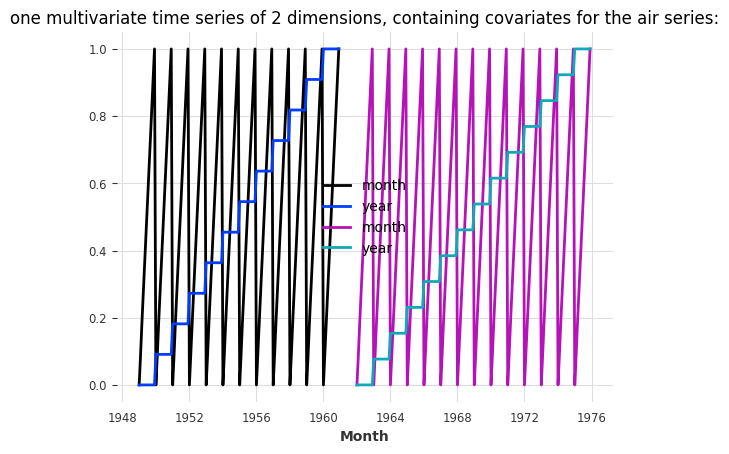

In [ ]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

air_covs = concatenate(
    [
        dt_attr(series_air, "month", dtype=np.float32),
        dt_attr(series_air, "year", dtype=np.float32),
    ],
    axis="component",
)

milk_covs = concatenate(
    [
        dt_attr(series_milk, "month", dtype=np.float32),
        dt_attr(series_milk, "year", dtype=np.float32),
    ],
    axis="component",
)

air_covs, milk_covs = Scaler().fit_transform([air_covs, milk_covs])
air_covs.plot()
milk_covs.plot()
plt.title(
    "one multivariate time series of 2 dimensions, containing covariates for the air series:"
)


<Axes: xlabel='Month'>

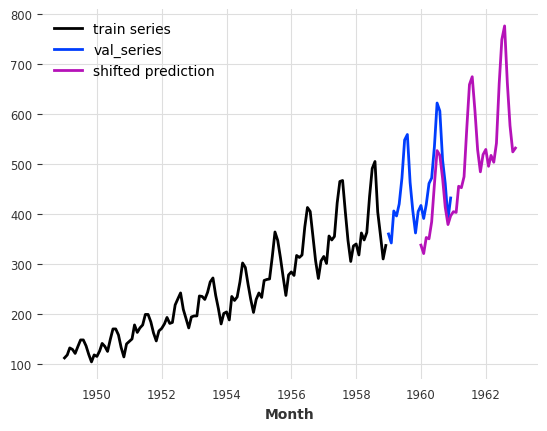

In [ ]:
model_shifted = LinearRegressionModel(
    lags=12,
    lags_future_covariates=(0, 12),
    output_chunk_length=36,
    output_chunk_shift=12,
)

model_shifted.fit(series_air[:-24], future_covariates=air_covs)
preds = model_shifted.predict(n=36)

series_air[:-24].plot(label="train series")
series_air[-24:].plot(label="val_series")
preds.plot(label="shifted prediction")



In [ ]:
from darts.datasets import WeatherDataset

from darts.models import TCNModel

series = WeatherDataset().load()

# predicting atmospheric pressure

target = series['p (mbar)'][:100]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)

past_cov = series['rain (mm)'][:100]

# `output_chunk_length` must be strictly smaller than `input_chunk_length`

model = TCNModel(

    input_chunk_length=12,

    output_chunk_length=6,

    n_epochs=20,

)

model.fit(target, past_covariates=past_cov)

pred = model.predict(6)

pred.values()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 104    | train
-------------------------------------------------------------
104       Trainable params
0         Non-trainable params
104       Total params
0.000     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[ 83.86104777],
       [ 86.60359531],
       [ 85.08126691],
       [ 92.23939808],
       [ 97.71271577],
       [101.3864464 ]])

<Axes: xlabel='Date Time'>

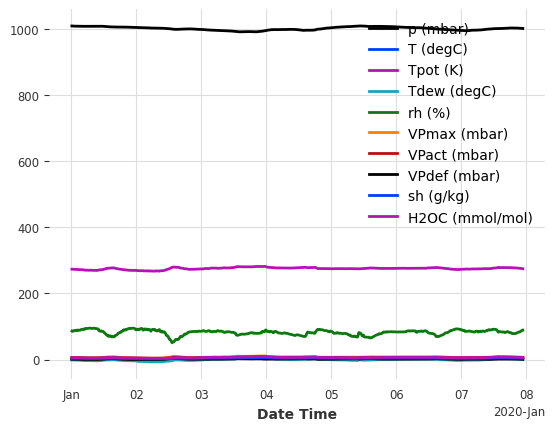

In [ ]:
series[0:1000].plot()

<Axes: xlabel='Date Time'>

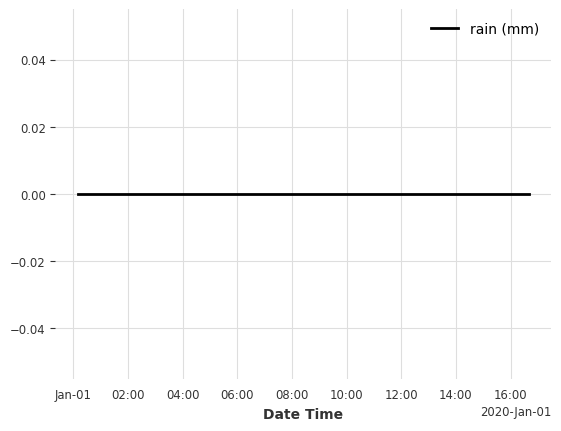

In [ ]:
series['rain (mm)'][0:100].plot()

<Axes: xlabel='Date Time'>

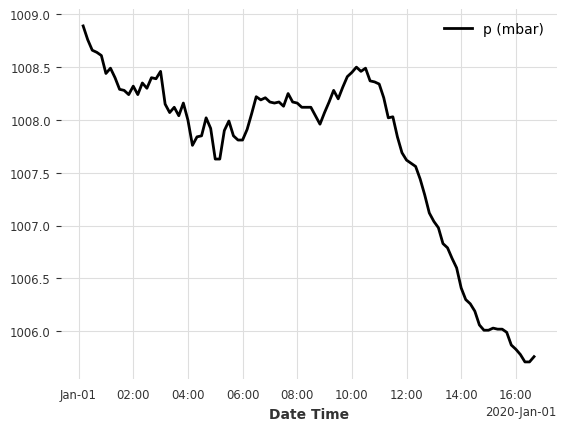

In [ ]:
series['p (mbar)'][0:100].plot()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Date Time'>

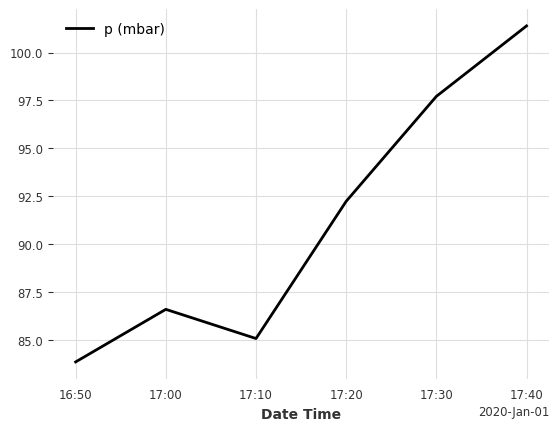

In [ ]:
pred = model.predict(6)

pred.plot()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Date Time'>

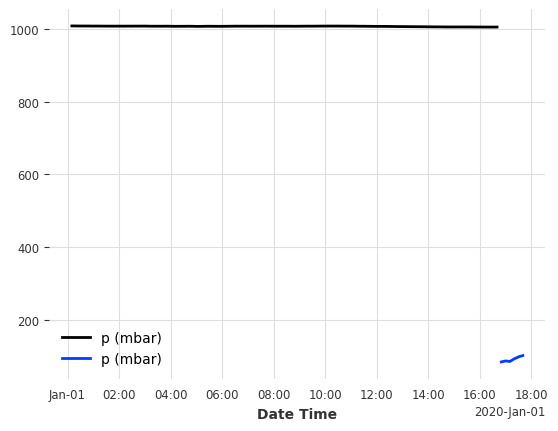

In [ ]:
series['p (mbar)'][0:100].plot()

pred = model.predict(6)
pred.plot()

---

# Forecest BTC com Darts TCNmodel

In [ ]:
# Código Original


from darts.datasets import WeatherDataset

from darts.models import TCNModel

series = WeatherDataset().load()

# predicting atmospheric pressure

target = series['p (mbar)'][:100]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)

past_cov = series['rain (mm)'][:100]

# `output_chunk_length` must be strictly smaller than `input_chunk_length`

model = TCNModel(

    input_chunk_length=12,

    output_chunk_length=6,

    n_epochs=20,

)

model.fit(target, past_covariates=past_cov)

pred = model.predict(6)

pred.values()

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.9 MB/s eta 0:00:

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset
import yfinance as yf

from darts.models import TCNModel

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
btc = yf.download('BTC-USD')
btc

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-10-30 00:00:00+00:00,72339.539062,72339.539062,72905.296875,71411.734375,72715.367188,40646637831
2024-10-31 00:00:00+00:00,70215.187500,70215.187500,72662.312500,69590.500000,72335.046875,40627912076


In [ ]:
btc_1 = TimeSeries.from_dataframe(btc['Adj Close'])
btc_1

<TimeSeries (DataArray) (Date: 3701, component: 1, sample: 1)> Size: 30kB
array([[[  457.33401489]],

       [[  424.44000244]],

       [[  394.79598999]],

       ...,

       [[69482.46875   ]],

       [[69289.2734375 ]],

       [[67683.453125  ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 30kB 2014-09-17 2014-09-18 ... 2024-11-03
  * component  (component) object 8B 'BTC-USD'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='Date'>

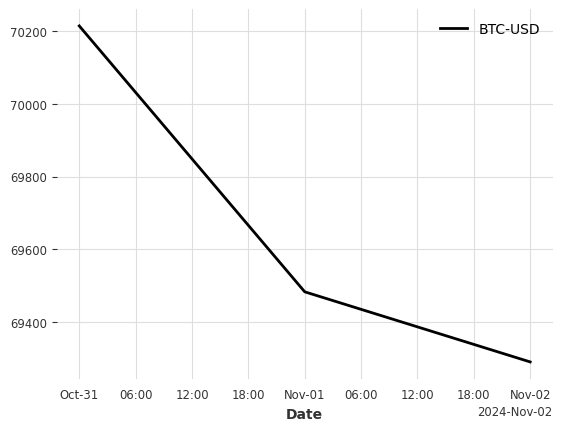

In [ ]:
btc_1[3697:3700].plot()

<Axes: xlabel='Date'>

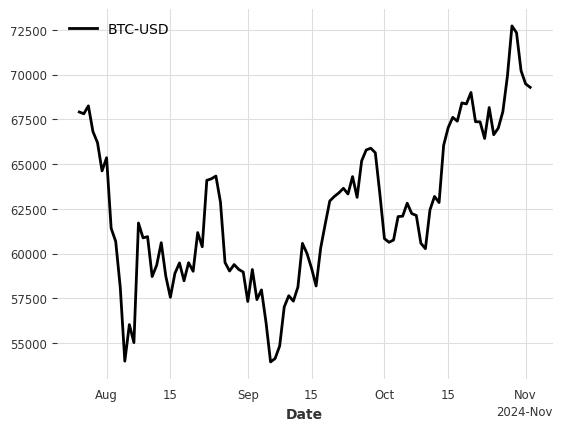

In [ ]:
btc_1[3600:3700].plot()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 344    | train
-------------------------------------------------------------
344       Trainable params
0         Non-trainable params
344       Total params
0.001     Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=250` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[70061.23856844],
       [69801.71872426],
       [70649.31512173],
       [69051.58279035],
       [68554.153257  ],
       [66954.40726932],
       [67529.78031344],
       [63234.30197074],
       [62519.57804738],
       [59963.22753703],
       [56156.60348323],
       [58049.37790989]])

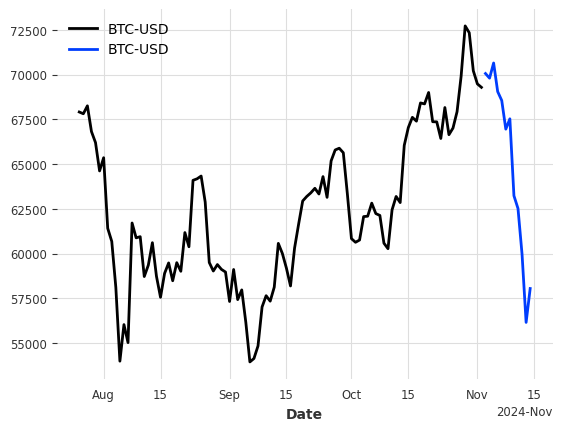

In [ ]:
series = btc_1

# predicting atmospheric pressure

target = series[:3700]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)

past_cov = series[:3700]

# `output_chunk_length` must be strictly smaller than `input_chunk_length`

model = TCNModel(

    input_chunk_length=200,

    output_chunk_length=100,

    n_epochs=250,

)

model.fit(target, past_covariates=past_cov)

pred = model.predict(12)

series[3600:3700].plot()
pred.plot()
pred.values()

In [ ]:
series[3700:3701]

<TimeSeries (DataArray) (Date: 1, component: 1, sample: 1)> Size: 8B
array([[[67683.453125]]])
Coordinates:
  * Date       (Date) datetime64[ns] 8B 2024-11-03
  * component  (component) object 8B 'BTC-USD'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

array([[70061.23856844],
       [69801.71872426],
       [70649.31512173],
       [69051.58279035],
       [68554.153257  ],
       [66954.40726932],
       [67529.78031344],
       [63234.30197074],
       [62519.57804738],
       [59963.22753703],
       [56156.60348323],
       [58049.37790989]])

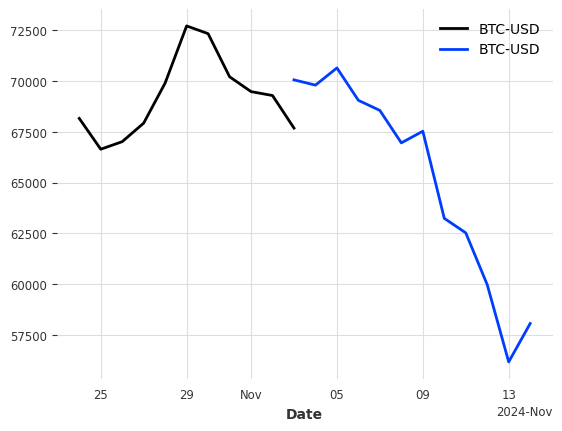

In [ ]:
series[3690:3701].plot()
pred.plot()
pred.values()

array([[70061.23856844],
       [69801.71872426],
       [70649.31512173],
       [69051.58279035],
       [68554.153257  ],
       [66954.40726932],
       [67529.78031344],
       [63234.30197074],
       [62519.57804738],
       [59963.22753703],
       [56156.60348323],
       [58049.37790989]])

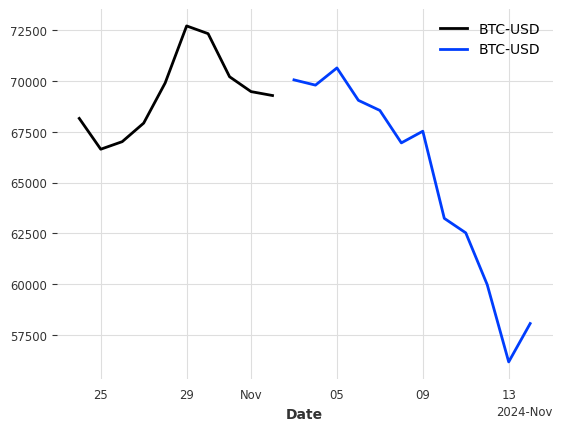

In [ ]:
#plt.figure(figsize=(10, 3))
series[3690:3700].plot()
pred.plot()
pred.values()

In [ ]:
pred.values()

array([[70061.23856844],
       [69801.71872426],
       [70649.31512173],
       [69051.58279035],
       [68554.153257  ],
       [66954.40726932],
       [67529.78031344],
       [63234.30197074],
       [62519.57804738],
       [59963.22753703],
       [56156.60348323],
       [58049.37790989]])

In [ ]:
stop == cell

NameError: name 'stop' is not defined

# Ampliando entendimento
